<a href="https://colab.research.google.com/github/shehan16/Senzmate/blob/main/senzmate_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High Level Architecture

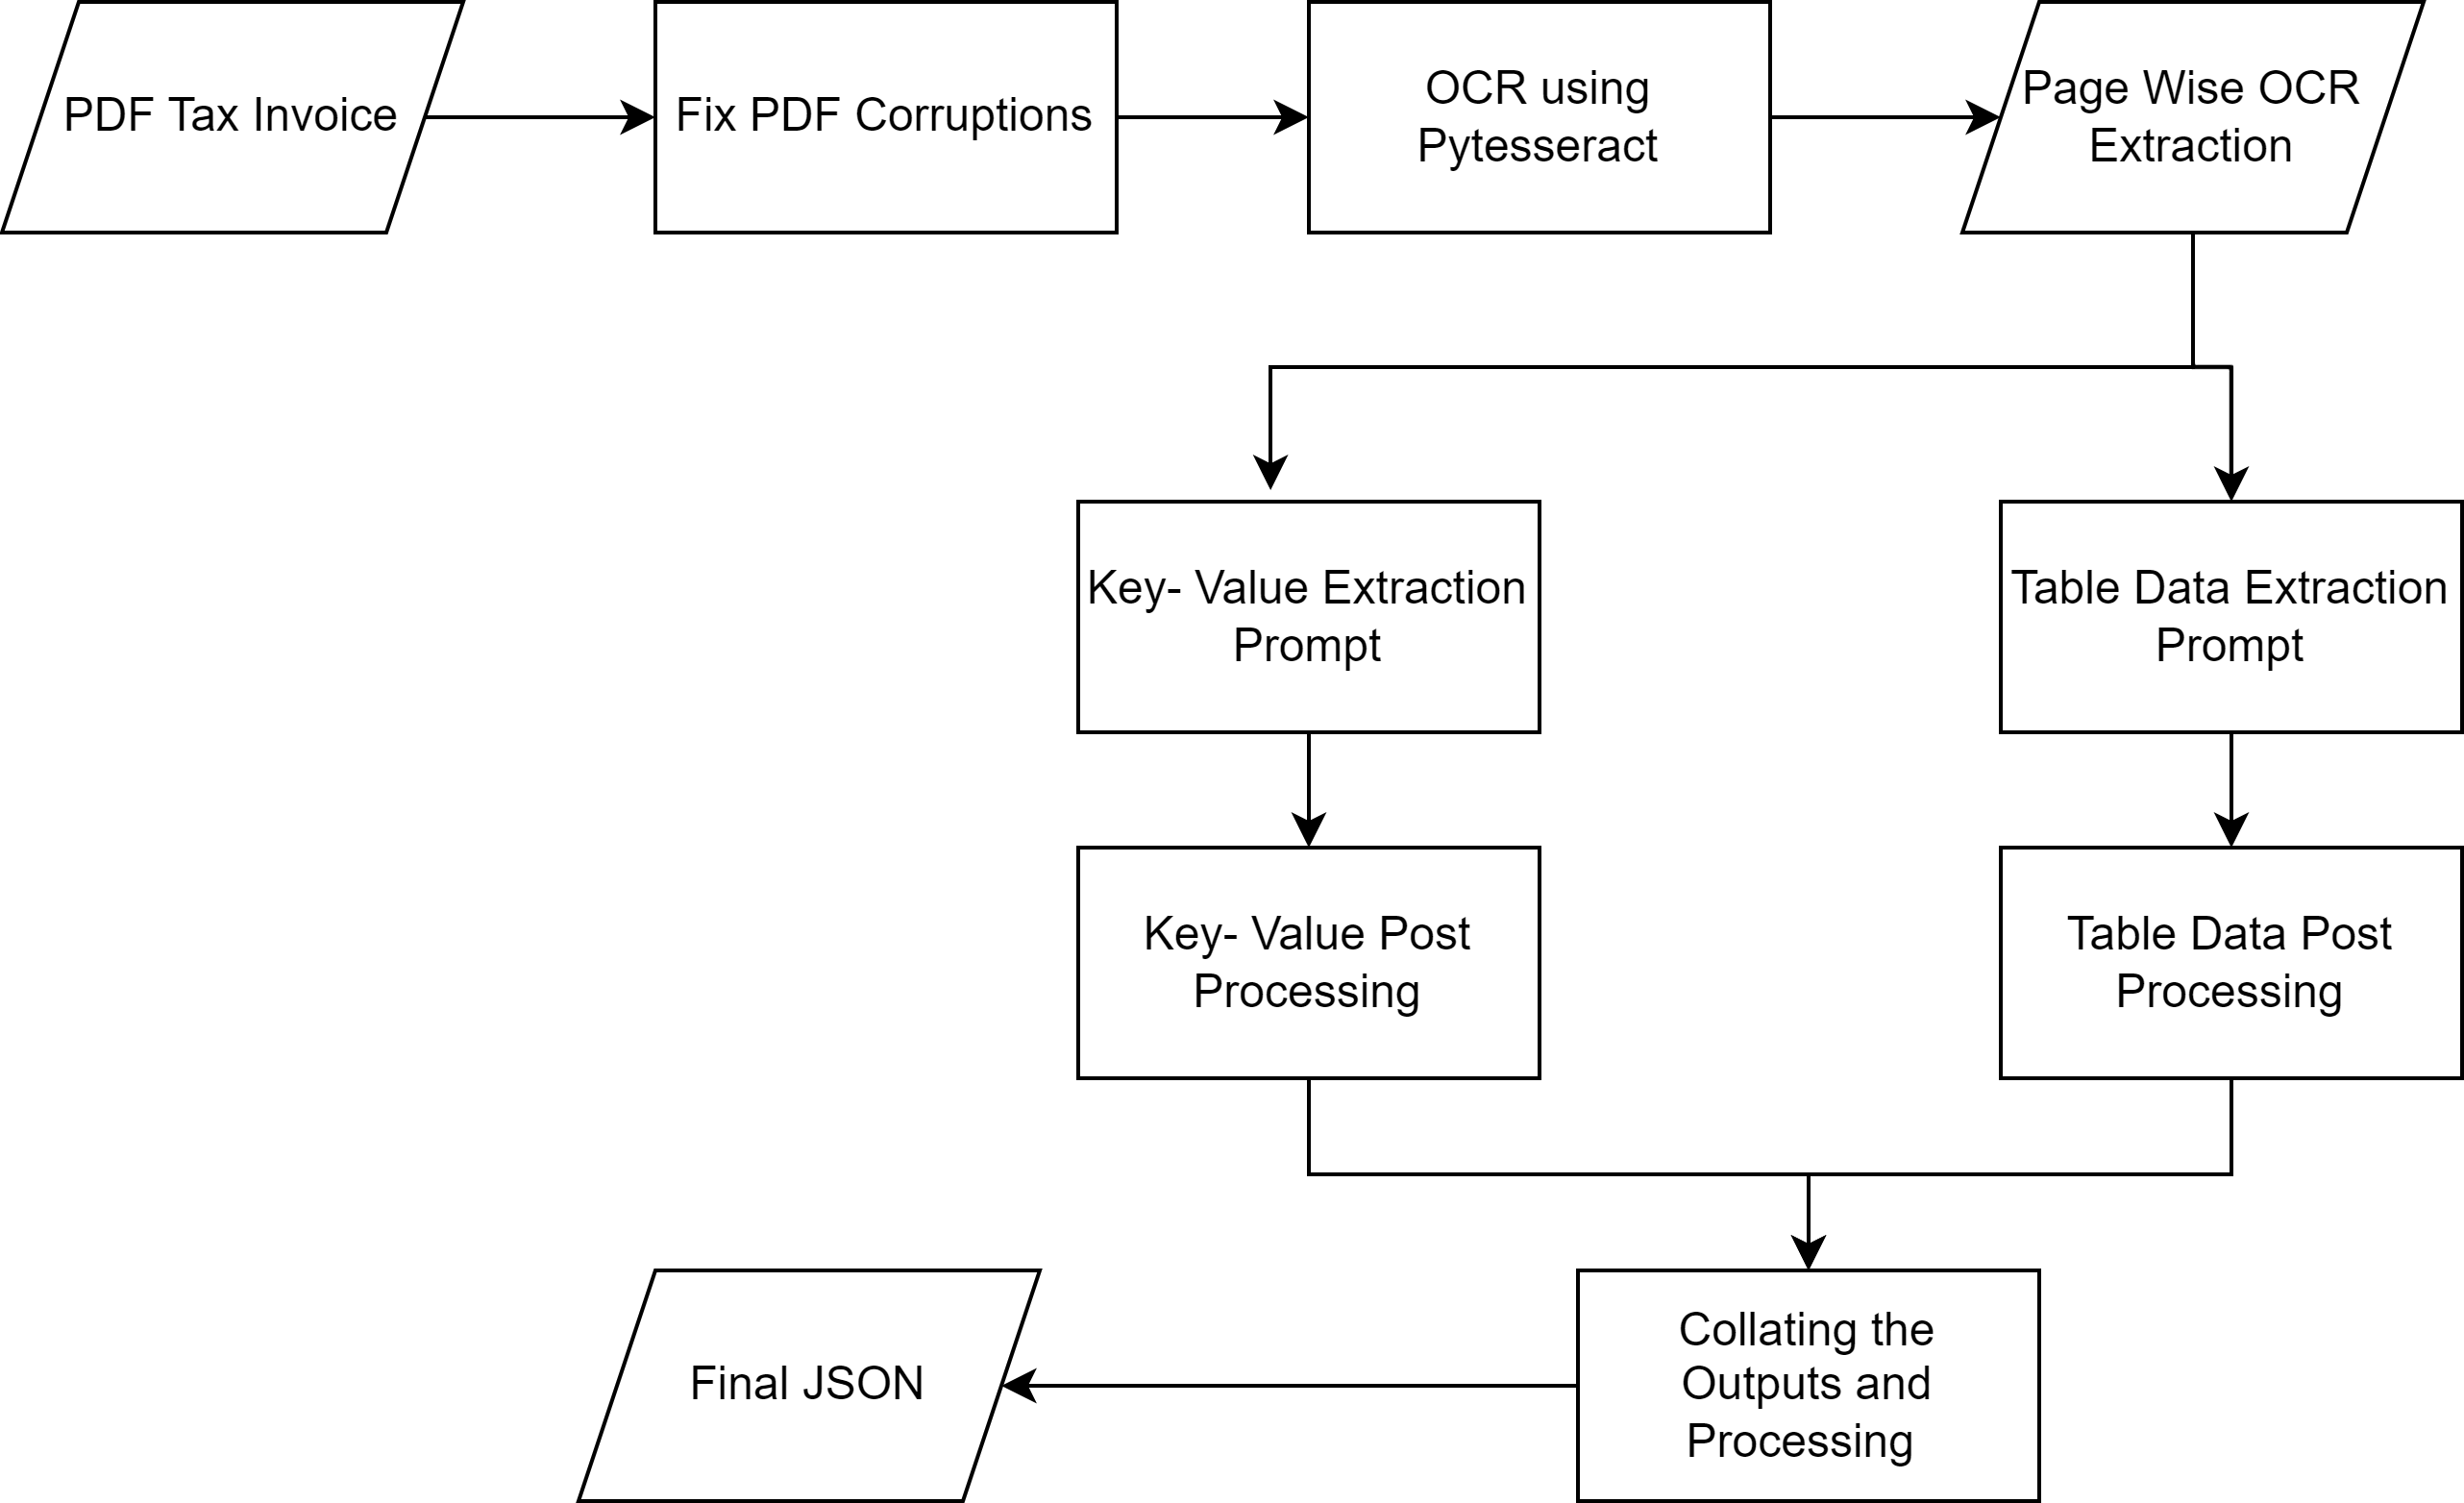

In [ ]:
!pip install pyPDF2 openai==0.28

# Install Tesseract OCR
!apt-get install tesseract-ocr -y

# Install Pytesseract Python Wrapper
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import requests
from PyPDF2 import PdfReader
import pytesseract
from PIL import Image
import io
import PyPDF2
import openai

# Importing Pytesseract
import pytesseract

# Set the path for Tesseract engine (specific to Colab environment)
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

Replace your openai or Azure openai credentials here

In [ ]:
openai.api_type = "azure"
openai.api_base = ###### Insert your base here ######
openai.api_version = "2023-07-01-preview"
openai.api_key = ###### Insert your key here ######

Define all the utility and Helper Functions

In [ ]:
def make_openai_call_gpt4(message):
    completion = openai.ChatCompletion.create(
            engine = ###### Insert your engine here ######,
            model ="gpt-4",
            messages= message,
            temperature = 0,
          )
    chat_response = completion.choices[0].message.content
    return chat_response


def make_openai_call_gpt35(message):
    completion = openai.ChatCompletion.create(
            engine = ###### Insert your engine here ######,
            model ="gpt-35-turbo",
            messages= message,
            temperature = 0,
          )
    chat_response = completion.choices[0].message.content
    return chat_response

In [ ]:
# Post-processing function to clean the JSON from the propmt output

def extract_between_curly_brackets(text):
    start = text.find('{')
    end = text.rfind('}')

    # Check if both curly brackets are found
    if start != -1 and end != -1 and end > start:
        return text[start:end+1]
    else:
        return "Curly brackets not found or in incorrect order."

Loading the Assignment PDF File

In [ ]:
# Function to download the PDF from Google Drive
def download_file_from_google_drive(url):
    response = requests.get(url)
    return io.BytesIO(response.content)

In [ ]:
# Your Google Drive link
google_drive_url = 'https://docs.google.com/document/d/1VewtEx3SQHblDNQuOXuF4cIxAQCj8YZh4hA56c7xvcA/edit?usp=sharing'

In [ ]:
# Download the PDF
pdf_file = download_file_from_google_drive(google_drive_url)

In [ ]:
# Read the PDF
try:
    pdf_reader = PdfReader(pdf_file)

    # Extract text using PyPDF2
    extracted_text = ""
    for page in pdf_reader.pages:
        extracted_text += page.extract_text() + "\n"

    # Additional OCR processing if necessary...

    print(extracted_text)

except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: EOF marker not found


Fixing the corrupted PDF for data extraction

In [ ]:
def reset_eof_of_pdf_return_stream(pdf_stream_in:list):
    # find the line position of the EOF
    for i, x in enumerate(txt[::-1]):
        if b'%%EOF' in x:
            actual_line = len(pdf_stream_in)-i
            print(f'EOF found at line position {-i} = actual {actual_line}, with value {x}')
            break

    # return the list up to that point
    return pdf_stream_in[:actual_line]


Please upload the Sample_For_Assignment.pdf to session storage in Google Colab

In [ ]:
# opens the file for reading
with open('Sample_For_Assignment.pdf', 'rb') as p:
    txt = (p.readlines())

# get the new list terminating correctly
txtx = reset_eof_of_pdf_return_stream(txt)

EOF found at line position 0 = actual 1176, with value b'%%EOF\n'


In [ ]:
# write to new pdf (fixing the corrupted PDF)
with open('Sample_For_Assignment_fixed.pdf', 'wb') as f:
    f.writelines(txtx)

fixed_pdf = PyPDF2.PdfReader('Sample_For_Assignment_fixed.pdf')

In [ ]:
fixed_pdf

Attempting to extract the data using PyPDF2

In [ ]:
# Extract text using PyPDF2
extracted_text = ""
for page in fixed_pdf.pages:
    extracted_text += page.extract_text() + "\n"

In [ ]:
extracted_text

'\n\n\n\n'

## 1. OCR

In [ ]:
page_texts = {}

In [ ]:
# For OCR (if needed), you would loop through each page, convert it to an image and then use Pytesseract

for page_number in range(len(fixed_pdf.pages)):
  page = fixed_pdf.pages[page_number]
  xObject = page['/Resources']['/XObject'].get_object()
  extracted_text = ''

  for obj in xObject:
      if xObject[obj]['/Subtype'] == '/Image':
          size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
          data = xObject[obj].get_data()
          image = Image.open(io.BytesIO(data))
          text = pytesseract.image_to_string(image, lang='eng')
          extracted_text += text

  page_texts["page_text{0}".format(page_number + 1)] = extracted_text
  #print(extracted_text)

In [ ]:
# Visulaizing Page 2 of the assignment

data = page_texts['page_text2']
print(data)


Page

 

 

 

 

J PRESCRIPTIONS [1

SLINICWARD PROCEDURES:

RPROCEDURES

615.46

 

Total Ch Payable

615.46)

 

 

515.46)

 

 

 

 

 

 
Th

CYTO2STD
PHANS2
PHASTD
PHASTD

AMOUNT PAYABLE BEFORE TAX
ADD: 7% GST

AMOUNT PAYABLE AFTER TAX

NET AMOUNT PAYABLE

SNR CONS - REPEAT VISIT

ALANINE AMINO TRANSFERASE (ALT)
ALBUMIN

ASPARTATE AMINO TRANSFERASE (AST)
BILIRUBIN TOTAL

CREATININE

MAGNESIUM

PHOSPHATASE ALKALINE

POTASSIUM

FULL BLOOD COUNT

ECG 12 LEADS

DRUGS NJECTIONS,
INFUSION SOLN

DiphenhydrAMINE HCL 50MG/ML INJ
HYDROCORTISONE SOD SUCCINATE” 100MG INJ
PARACETAMOL? 500MG TAB

FLUSHING OF CENTRAL VENOUS CATHETER

IV CHEMOTHERAPY INFUSION

DRESSING STO I

FACILITY CHARGE - BED

HAEMATOLOGY DRUG PREPARATION FEE (SIMPLE)

1of 2

100.00
100.00
141,50
13.90
13.90
13.90
41.60
12.10
17.40
16.70
11,60
30.40
44.30
44,30
11.86
7.00
2.00
2.76
0.10
184.20
60.20
85.30
38.70
133.60
123 00
10.60

43.07
658.53

658.53
Singapore
General Hospital

SingHealth

GST REG NO : M90368910N

SIN

## 2. Key- Value Pair Data Extraction

In [ ]:
def get_headers(invoice):

  prompt_extract_header = f"""Your task is to extract the information from a tax invoice. \
  The tax invoice may contain metadata and is consisting of a table with columns 'service code', 'description', 'quantity' and 'amount'.

  The tax invoice is in image format and has been OCR for text extraction for further processing.\
  Hence, it should be noted that all the information might not be in proper order.

  The OCR extract of the medical invoice is given enclosed by triple backticks.
  OCR EXTRACT: ```{invoice}```

  Extract the following information (keys) if available.

    Patient Name
    Patient National ID
    Hospital / clinic
    GST Reg No of the hospital/clinic [if available])
    Visit Date
    Tax Invoice Date
    Bill /receipt date
    Admission date
    Discharge date of the invoice
    Tax invoice number/Invoice No of the invoice/receipt),
    Bill reference number
    Total Amount Payable
    Invoice Page (invoice page as shown on the restructured hospital bill, e.g., 1 OF 2 and 2 OF 2)
    Doctor Name
    Location
    Bill Type [ORIGINAL/DUPLICATE/INTERIM]

  Give the output in JSON format with the keys mentioned above
  Give the JSON output only
  If you cannot find an answer for a JSON key, put 'NULL'
  Do not give reasoning
  """

  response = make_openai_call_gpt4([{"role": "user", "content": prompt_extract_header}])
  return response

In [ ]:
invoice = data
text_data = get_headers(invoice)
text_data

'```json\n{\n  "Patient Name": "NULL",\n  "Patient National ID": "NULL",\n  "Hospital / clinic": "Singapore General Hospital",\n  "GST Reg No of the hospital/clinic": "M90368910N",\n  "Visit Date": "05.10.2018 1035 hrs",\n  "Tax Invoice Date": "09.10.2018 1010 hrs",\n  "Bill /receipt date": "NULL",\n  "Admission date": "NULL",\n  "Discharge date of the invoice": "NULL",\n  "Tax invoice number/Invoice No of the invoice/receipt": "6818337074E0004",\n  "Bill reference number": "6818337074E-0004-01",\n  "Total Amount Payable": "658.53",\n  "Invoice Page": "1 of 2",\n  "Doctor Name": "NULL",\n  "Location": "GCLHAEC / GMBBO2 / HAE",\n  "Bill Type": "ORIGINAL"\n}\n```'

In [ ]:
text_data = extract_between_curly_brackets(text_data)
text_data

'{\n  "Patient Name": "NULL",\n  "Patient National ID": "NULL",\n  "Hospital / clinic": "Singapore General Hospital",\n  "GST Reg No of the hospital/clinic": "M90368910N",\n  "Visit Date": "05.10.2018 1035 hrs",\n  "Tax Invoice Date": "09.10.2018 1010 hrs",\n  "Bill /receipt date": "NULL",\n  "Admission date": "NULL",\n  "Discharge date of the invoice": "NULL",\n  "Tax invoice number/Invoice No of the invoice/receipt": "6818337074E0004",\n  "Bill reference number": "6818337074E-0004-01",\n  "Total Amount Payable": "658.53",\n  "Invoice Page": "1 of 2",\n  "Doctor Name": "NULL",\n  "Location": "GCLHAEC / GMBBO2 / HAE",\n  "Bill Type": "ORIGINAL"\n}'

In [ ]:
import json
try:
  json_data = json.loads(text_data)
except:
  print('Key Value Pair JSON Loading Failure')

In [ ]:
json_data

{'Patient Name': 'NULL',
 'Patient National ID': 'NULL',
 'Hospital / clinic': 'Singapore General Hospital',
 'GST Reg No of the hospital/clinic': 'M90368910N',
 'Visit Date': '05.10.2018 1035 hrs',
 'Tax Invoice Date': '09.10.2018 1010 hrs',
 'Bill /receipt date': 'NULL',
 'Admission date': 'NULL',
 'Discharge date of the invoice': 'NULL',
 'Tax invoice number/Invoice No of the invoice/receipt': '6818337074E0004',
 'Bill reference number': '6818337074E-0004-01',
 'Total Amount Payable': '658.53',
 'Invoice Page': '1 of 2',
 'Doctor Name': 'NULL',
 'Location': 'GCLHAEC / GMBBO2 / HAE',
 'Bill Type': 'ORIGINAL'}

In [ ]:
# Using dictionary comprehension to filter out keys with 'NULL' values
filtered_data = {key: value for key, value in json_data.items() if value != 'NULL'}
print(filtered_data)

{'Hospital / clinic': 'Singapore General Hospital', 'GST Reg No of the hospital/clinic': 'M90368910N', 'Visit Date': '05.10.2018 1035 hrs', 'Tax Invoice Date': '09.10.2018 1010 hrs', 'Tax invoice number/Invoice No of the invoice/receipt': '6818337074E0004', 'Bill reference number': '6818337074E-0004-01', 'Total Amount Payable': '658.53', 'Invoice Page': '1 of 2', 'Location': 'GCLHAEC / GMBBO2 / HAE', 'Bill Type': 'ORIGINAL'}


## 3. Table Data Extraction

In [ ]:
def extract_columns(invoice):

  prompt_extract_columns = f"""Your task is to extract the information from a tax invoice. \
  The tax invoice may contain metadata and is consisting of a table with columns 'service code', 'description', 'quantity' and 'amount'.

  The tax invoice is in image format and has been OCR for text extraction for further processing.\
  Hence, it should be noted that all the information might not be in proper order.

  The OCR extract of the medical invoice is given enclosed by triple backticks.
  OCR EXTRACT: ```{invoice}```

  First identify the data for 'description'. The description column should contain only texts with a medical meaning. \
  Any other non meaningful codes should not be a part of 'description' column. Prepare this identified data as a Python list

  Then identify the data for 'quantity'. This can have both numerical and textual data such as 'Subtotal'. \
  The data for'quantity' column are in consecutive rows and it starts with 'Subtotal' and ends with 'Subtotal Charges'. \
  In between the start and the end, there are both numbers as well as the term 'Subtotal'.
  Extract this data only and prepare it as a Python list

  Finally, identify the data for 'amount'. prepare it as a Python list

  Give the final output in JSON format only, with the keys 'description', 'quantity' and 'amount'. The extracted Python lists should be\
  provided as the value for each key.

  Do not give reasoning
  """

  response = make_openai_call_gpt4([{"role": "user", "content": prompt_extract_columns}])
  return response

In [ ]:
invoice = data
text_data = extract_columns(invoice)

In [ ]:
text_data

'```json\n{\n  "description": [\n    "ALANINE AMINO TRANSFERASE (ALT)",\n    "ALBUMIN",\n    "ASPARTATE AMINO TRANSFERASE (AST)",\n    "BILIRUBIN TOTAL",\n    "CREATININE",\n    "MAGNESIUM",\n    "PHOSPHATASE ALKALINE",\n    "POTASSIUM",\n    "FULL BLOOD COUNT",\n    "ECG 12 LEADS",\n    "DRUGS NJECTIONS, INFUSION SOLN",\n    "DiphenhydrAMINE HCL 50MG/ML INJ",\n    "HYDROCORTISONE SOD SUCCINATE 100MG INJ",\n    "PARACETAMOL 500MG TAB",\n    "FLUSHING OF CENTRAL VENOUS CATHETER",\n    "IV CHEMOTHERAPY INFUSION",\n    "DRESSING STO I",\n    "FACILITY CHARGE - BED",\n    "HAEMATOLOGY DRUG PREPARATION FEE (SIMPLE)"\n  ],\n  "quantity": [\n    "Subtotal",\n    "1",\n    "Subtotal",\n    "4",\n    "1",\n    "1",\n    "1",\n    "1",\n    "1",\n    "1",\n    "1",\n    "Subtotal",\n    "1",\n    "Subtotal",\n    "1",\n    "1",\n    "1",\n    "2",\n    "Subtotal",\n    "1",\n    "1",\n    "1",\n    "Subtotal",\n    "4",\n    "1",\n    "Subtotal Charges"\n  ],\n  "amount": [\n    "100.00",\n    "

In [ ]:
# Post-processing for JSON cleansing
text = text_data
result = extract_between_curly_brackets(text)
print(result)

{
  "description": [
    "ALANINE AMINO TRANSFERASE (ALT)",
    "ALBUMIN",
    "ASPARTATE AMINO TRANSFERASE (AST)",
    "BILIRUBIN TOTAL",
    "CREATININE",
    "MAGNESIUM",
    "PHOSPHATASE ALKALINE",
    "POTASSIUM",
    "FULL BLOOD COUNT",
    "ECG 12 LEADS",
    "DRUGS NJECTIONS, INFUSION SOLN",
    "DiphenhydrAMINE HCL 50MG/ML INJ",
    "HYDROCORTISONE SOD SUCCINATE 100MG INJ",
    "PARACETAMOL 500MG TAB",
    "FLUSHING OF CENTRAL VENOUS CATHETER",
    "IV CHEMOTHERAPY INFUSION",
    "DRESSING STO I",
    "FACILITY CHARGE - BED",
    "HAEMATOLOGY DRUG PREPARATION FEE (SIMPLE)"
  ],
  "quantity": [
    "Subtotal",
    "1",
    "Subtotal",
    "4",
    "1",
    "1",
    "1",
    "1",
    "1",
    "1",
    "1",
    "Subtotal",
    "1",
    "Subtotal",
    "1",
    "1",
    "1",
    "2",
    "Subtotal",
    "1",
    "1",
    "1",
    "Subtotal",
    "4",
    "1",
    "Subtotal Charges"
  ],
  "amount": [
    "100.00",
    "100.00",
    "141.50",
    "13.90",
    "13.90",
    "13.90",


Extracting the data into separate lists

In [ ]:
json_data = json.loads(result)
description = json_data['description']
quantity = json_data['quantity']
amount = json_data['amount']
quantity

['Subtotal',
 '1',
 'Subtotal',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 'Subtotal',
 '1',
 'Subtotal',
 '1',
 '1',
 '1',
 '2',
 'Subtotal',
 '1',
 '1',
 '1',
 'Subtotal',
 '4',
 '1',
 'Subtotal Charges']

Removing 'Subtotal' items from the 'quantity' and 'amount'

In [ ]:

A = quantity
B = amount

# Find indices where 'Subtotal' occurs in A
indices = [i for i, x in enumerate(A) if (x == 'Subtotal' or x == 'Subtotal Charges') ]

# Remove elements from A and B at these indices
quantity = [a for i, a in enumerate(A) if i not in indices]
amount = [b for i, b in enumerate(B) if i not in indices]

# Output result
print(quantity)

['1', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '4', '1']


The lengths below should be similar. The OCR step is not perfect. Hence, there is an issue.

However, I am continuing with the assignment

In [ ]:
# Issue with OCR (Ideally these should be similar in length)
print(len(description))
print(len(quantity))
print(len(amount))

19
19
19


Creating the 'Unit Price' column

In [ ]:
unit_price = [float(a)/float(q) for a, q in zip(amount, quantity)]
unit_price

[100.0,
 3.475,
 13.9,
 13.9,
 41.6,
 12.1,
 17.4,
 16.7,
 11.6,
 44.3,
 11.86,
 7.0,
 2.0,
 1.38,
 184.2,
 60.2,
 85.3,
 33.4,
 123.0]

Creating the final data structure for table data

In [ ]:
# Using list comprehension and zip to combine the lists into a list of dictionaries
table_data = [
    {"description": desc, "quantity": qty, "unit_price": price, "amount": amt}
    for desc, qty, price, amt in zip(description, quantity, unit_price, amount)
]

table_data

[{'description': 'ALANINE AMINO TRANSFERASE (ALT)',
  'quantity': '1',
  'unit_price': 100.0,
  'amount': '100.00'},
 {'description': 'ALBUMIN',
  'quantity': '4',
  'unit_price': 3.475,
  'amount': '13.90'},
 {'description': 'ASPARTATE AMINO TRANSFERASE (AST)',
  'quantity': '1',
  'unit_price': 13.9,
  'amount': '13.90'},
 {'description': 'BILIRUBIN TOTAL',
  'quantity': '1',
  'unit_price': 13.9,
  'amount': '13.90'},
 {'description': 'CREATININE',
  'quantity': '1',
  'unit_price': 41.6,
  'amount': '41.60'},
 {'description': 'MAGNESIUM',
  'quantity': '1',
  'unit_price': 12.1,
  'amount': '12.10'},
 {'description': 'PHOSPHATASE ALKALINE',
  'quantity': '1',
  'unit_price': 17.4,
  'amount': '17.40'},
 {'description': 'POTASSIUM',
  'quantity': '1',
  'unit_price': 16.7,
  'amount': '16.70'},
 {'description': 'FULL BLOOD COUNT',
  'quantity': '1',
  'unit_price': 11.6,
  'amount': '11.60'},
 {'description': 'ECG 12 LEADS',
  'quantity': '1',
  'unit_price': 44.3,
  'amount': '44.3

In [ ]:
# Combining to create a final output
final_output = {"Table": table_data, "Key_Values": filtered_data}
final_output = json.dumps(final_output, indent=3)
print(final_output)

{
   "Table": [
      {
         "description": "ALANINE AMINO TRANSFERASE (ALT)",
         "quantity": "1",
         "unit_price": 100.0,
         "amount": "100.00"
      },
      {
         "description": "ALBUMIN",
         "quantity": "4",
         "unit_price": 3.475,
         "amount": "13.90"
      },
      {
         "description": "ASPARTATE AMINO TRANSFERASE (AST)",
         "quantity": "1",
         "unit_price": 13.9,
         "amount": "13.90"
      },
      {
         "description": "BILIRUBIN TOTAL",
         "quantity": "1",
         "unit_price": 13.9,
         "amount": "13.90"
      },
      {
         "description": "CREATININE",
         "quantity": "1",
         "unit_price": 41.6,
         "amount": "41.60"
      },
      {
         "description": "MAGNESIUM",
         "quantity": "1",
         "unit_price": 12.1,
         "amount": "12.10"
      },
      {
         "description": "PHOSPHATASE ALKALINE",
         "quantity": "1",
         "unit_price": 17.4,
   

# *Final Code::*

Running the code for the two tax invoices from Singapore General Hospital

In [ ]:
assignment_output = []
# Reading from the OCR extraction to get the first two invoices
for id,page in enumerate(['page_text1','page_text2']):
  invoice = page_texts[page]

  # ******************** 1. Extract Key-Value Pairs ********************

  text_data = get_headers(invoice)
  text_data = extract_between_curly_brackets(text_data)
  try:
    json_data = json.loads(text_data)
  except:
    print('Key Value Pair JSON Parsing Failure')
    break
  # Using dictionary comprehension to filter out keys with 'NULL' values
  filtered_data = {key: value for key, value in json_data.items() if value != 'NULL'}

  #- ******************** 2. Table Data Extraction ********************

  text_data = extract_columns(invoice)
  text_data = extract_between_curly_brackets(text_data)

  try:
    json_data = json.loads(text_data)
  except:
    print('Table Data JSON Parsing Failure')
    break

  # Extracting the data into separate lists

  description = json_data['description']
  quantity = json_data['quantity']
  amount = json_data['amount']

  # Removing 'Subtotal' items from the 'quantity' and 'amount'

  A = quantity
  B = amount

  # Find indices where 'Subtotal' occurs in A
  indices = [i for i, x in enumerate(A) if (x == 'Subtotal' or x == 'Subtotal Charges') ]

  # Remove elements from A and B at these indices
  quantity = [a for i, a in enumerate(A) if i not in indices]
  amount = [b for i, b in enumerate(B) if i not in indices]

  # Creating unit price column
  unit_price = [float(a)/float(q) for a, q in zip(amount, quantity)]

  # Creating final data structure
  # Using list comprehension and zip to combine the lists into a list of dictionaries
  table_data = [
      {"description": desc, "quantity": qty, "unit_price": price, "amount": amt}
      for desc, qty, price, amt in zip(description, quantity, unit_price, amount)
  ]

  # Combining to create a final output
  final_output = {"Page_Number":str(id + 1), "Table": table_data, "Key_Values": filtered_data}
  #final_output = json.dumps(final_output, indent=3)
  assignment_output.append(final_output)

In [ ]:
  assignment_output

[{'Page_Number': '1',
  'Table': [{'description': 'HLA DQB TYPING (PCR INT TO HIGH RES)',
    'quantity': '1',
    'unit_price': 243.93,
    'amount': '243.93'},
   {'description': 'HANDLING FEE',
    'quantity': '1',
    'unit_price': 18.0,
    'amount': '18.00'},
   {'description': 'HLA ABCDR TYPING (SBT) FOR LOCAL TRANSPLANT',
    'quantity': '1',
    'unit_price': 885.98,
    'amount': '885.98'},
   {'description': 'HANDLING FEE',
    'quantity': '1',
    'unit_price': 18.0,
    'amount': '18.00'},
   {'description': 'CREATININE CLEARANCE TEST (CCT)',
    'quantity': '1',
    'unit_price': 24.9,
    'amount': '24.90'},
   {'description': 'GLUCOSE-6-PHOSPHATE DEHYDROGENAS',
    'quantity': '1',
    'unit_price': 23.3,
    'amount': '23.30'},
   {'description': 'GLUCOSE-6-PHOSPHATE DEHYDROGENAS',
    'quantity': '1',
    'unit_price': 23.3,
    'amount': '23.30'},
   {'description': 'VARICELLA-ZOSTER IGG AB',
    'quantity': '1',
    'unit_price': 43.8,
    'amount': '43.80'},
   {'d